Check the available GPU.

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7871817742287989379
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14572388352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7044479868821675223
physical_device_desc: "device: 0, name: Quadro RTX 5000, pci bus id: 0000:03:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


2024-09-25 13:50:04.521937: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /device:GPU:0 with 13897 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:03:00.0, compute capability: 7.5


<_MapDataset element_spec=TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None)>
(1, 20, 18, 196608)
20 18


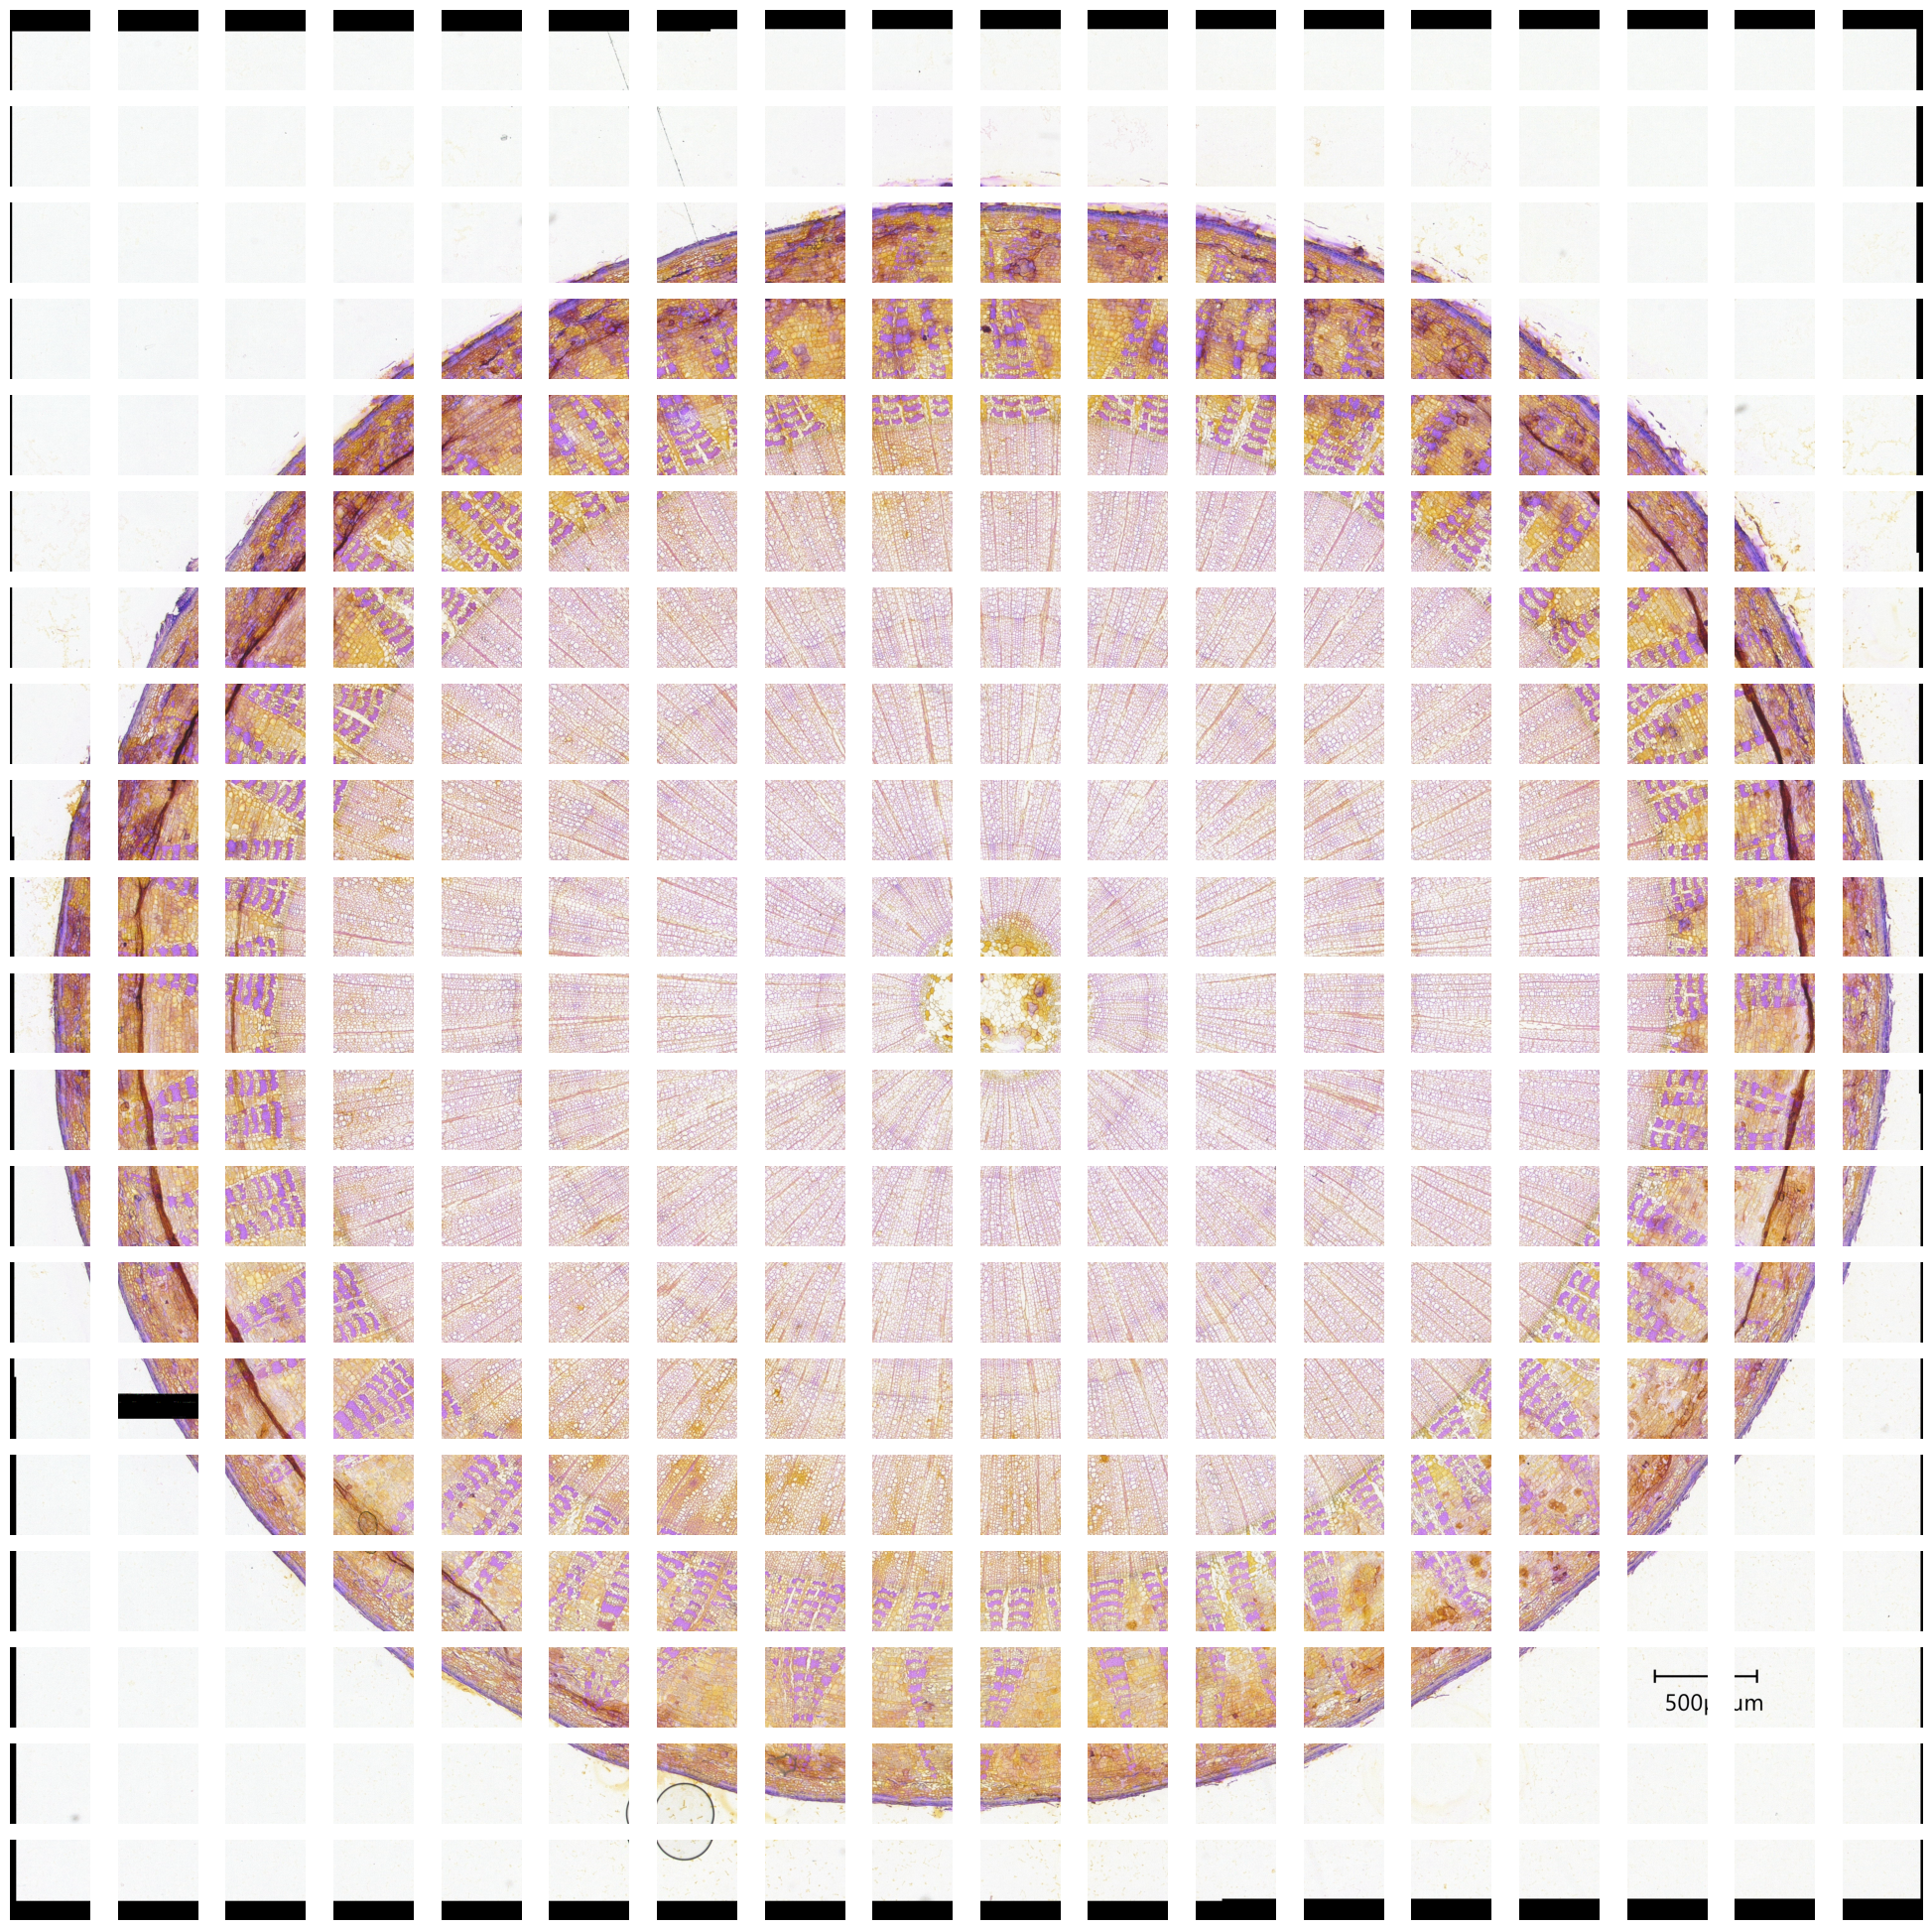

In [60]:
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import cv2

image_file = '/media/baecker/6b38a953-6650-4da5-94d9-57bd718df733/2024/in/2007-tree-rings/in/4 E 1 m_8µm_x50.tif'

def parse_with_opencv(image_path):
    return cv2.imread(image_path.decode('UTF-8'))

img_path = [image_file]

ds = tf.data.Dataset.from_tensor_slices(img_path).map(
    lambda x: tf.numpy_function(parse_with_opencv, [x], Tout=tf.uint8)
) 



ksize_rows = 256
ksize_cols = 256
strides_rows = 256
strides_cols = 256


image = ds # tfio.experimental.image.decode_tiff(image_data)

print(image)
# The size of sliding window
ksizes = [1, ksize_rows, ksize_cols, 1] 

# How far the centers of 2 consecutive patches are in the image
strides = [1, strides_rows, strides_cols, 1]

# The document is unclear. However, an intuitive example posted on StackOverflow illustrate its behaviour clearly. 
# http://stackoverflow.com/questions/40731433/understanding-tf-extract-image-patches-for-extracting-patches-from-an-image
rates = [1, 1, 1, 1] # sample pixel consecutively

# padding algorithm to used
padding='SAME' # or 'SAME'

# image = tf.expand_dims(image, 0)
image_patches = tf.image.extract_patches(images=list(ds), sizes=ksizes, strides=strides, rates=rates, padding=padding)

# print image shape of image patches
print(image_patches.shape)

# image_patches is 4 dimension array, you can use tf.squeeze to squeeze it, e.g.
# image_patches = tf.squeeze(image_patches)
columns = image_patches.shape[1]
rows = image_patches.shape[2]

print(columns, rows)
# retrieve the 1st patches
fig = plt.figure(figsize=(25, 25)) 
fig.tight_layout()
i = 1
for col in range(columns):
    for row in range(rows):
        patch = image_patches[0,col,row,]
        patch = tf.reshape(patch, [ksize_rows, ksize_cols, 3])        
        fig.add_subplot(columns, rows, i) 
        plt.axis('off') 
        plt.imshow(patch)
        i = i + 1
# visualize image

plt.show()

